# Perceptrons

In this notebook, we will build and train a perceptron. The perceptron was an early classifier that started as an attempt to mathematically model the neuron. The question generally was - what kind of computational systems can be made that are inspired by the biological neuron? The perceptron can only classify linearly separable classes but was a precursor to other forms of artificial neural networks (ANN).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris and grab our data and labels
iris = load_iris()
labels, data = iris.target, iris.data

target_names = iris.target_names

iris_df = pd.DataFrame(data, columns = iris.feature_names)

In [2]:
# Adding the label number and label names to our dataframe
iris_df['label'] = labels
iris_df['label_name'] = [iris.target_names[l] for l in labels]

# Uncomment to randomize the data - try running without randomizing
# and then with randomizing and observe the difference in training
# iris_df = iris_df.sample(frac=1)

# We're only going to be using the virginica and setosa classes for this exercise
iris_subset_df = iris_df[iris_df.label_name != 'virginica']
iris_subset_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


Let's plot our data to ensure it's linearly separable. We can see below that a straight line can be drawn between the points, separating them

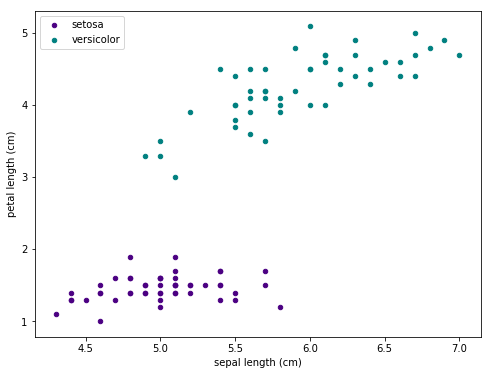

In [3]:
colors = ['indigo', 'teal']

fig, ax = plt.subplots(1, 1, figsize=(8,6))

for key, row in iris_subset_df.groupby('label'):
    row.plot.scatter(ax=ax, x='sepal length (cm)', y='petal length (cm)', label=target_names[key], color=colors[key]);

## What is a perceptron?

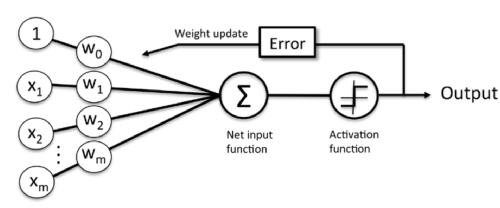
*Picture from "Python Machine Learning by Sebastian Raschka, 2015"*

More coming soon. In the meantime, refer to the extra materials provided

# Writing our perceptron

In [4]:
# First we get our training vectors. X is our training values,
# and y are the associated class values

X = iris_subset_df[['sepal length (cm)', 'petal length (cm)']].values
y = iris_subset_df['label_name'].values
y = np.where(y == 'setosa', -1, 1)

In [5]:
# Then we define our learning variables

# This is the learning rate of our perceptron
rate = 0.01

# This is the number of training iterations we want 
# our perceptron to undergo
niter = 10

# These are the weights for our perceptron
weight = np.zeros(1 + X.shape[1])

# Number of misclassifications - we'll plot these later
errors = []


In [6]:
# Next we define our prediction function. This function takes
# the perceptrons weights and calculates the dot product which
# is the sum of the products of the weights and input vectors.
# This is then run through the activation function, which
# returns 1 if the dot value is greater than or equal to 0, 
# and -1 if the dot product is less than 0

def predict(X):
    net_input = np.dot(X, weight[1:]) + weight[0]
    activations = np.where(net_input >= 0.0, 1, -1) #if statement instead?
    return activations

In [7]:
# To train the perceptron, we create a loop to perform our training function
for i in range(niter):
    err = 0
    # we loop through all the data points and the target classes
    for xi, target in zip(X, y):
        # we then calculate the difference between the target value
        # and the predicted value. This can only ouput -2, 2, or 0 -
        # either (-1 - 1), (1 - (-1)), (-1 + 1), or (1 - 1)
        # The rate variable controls input
        delta_w = rate * (target - predict(xi))
        # We then use this to adjust the weights based on the input value
        weight[1:] += delta_w * xi
        # or adjust the offset weight 
        weight[0] += delta_w
        # Finally, this nifty function increments the error value by 1
        # for each misclassification
        err += int(delta_w != 0.0)
    # We then keep track of our errors here
    errors.append(err)

Now that we've trained our perceptron, we can plot the number of misclassifications against the number of training epochs. Looking below, we can see our perceptron converged on a solution with zero error on the 6th epoch.

Text(0, 0.5, 'Number of misclassifications')

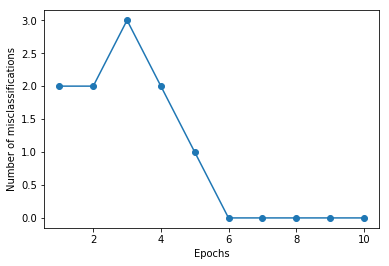

In [8]:
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

# Plotting the decision boundary

Using matplotlib we can plot the decision boundary of the perceptron to see where our boundaries lie. Any data point on either side of the red line corresponds to its respective class.

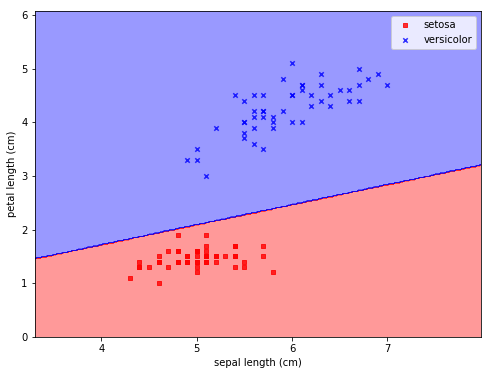

In [9]:
from matplotlib.colors import ListedColormap

resolution=0.02
markers = ['s', 'x']
colors = ['red', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

fig, ax = plt.subplots(1, 1, figsize=(8,6))

# plot the decision surface
x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

for key, row in iris_subset_df.groupby('label'):
    row.plot.scatter(ax=ax,
    x='sepal length (cm)',
    y='petal length (cm)',
    label=target_names[key],
    c=colors[key], alpha=0.8,
    marker=markers[key]);
